In [6]:
# upload requirements.txt downloaded from https://raw.githubusercontent.com/Hananel-Hazan/bindsnet/master/requirements.txt
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving requirements.txt to requirements.txt
User uploaded file "requirements.txt" with length 244 bytes


In [7]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -r requirements.txt

    100% |████████████████████████████████| 245kB 16.1MB/s 
    100% |████████████████████████████████| 6.4MB 6.3MB/s 
    100% |████████████████████████████████| 450kB 28.5MB/s 
    100% |████████████████████████████████| 71kB 22.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/d7/e7/c8/153284a6e5e5c3fd4da42a8453175b45e2e185e8b5a09ced06
Successfully built foolbox


Loading training images from serialized object file.

Loading training labels from serialized object file.



AttributeError: ignored

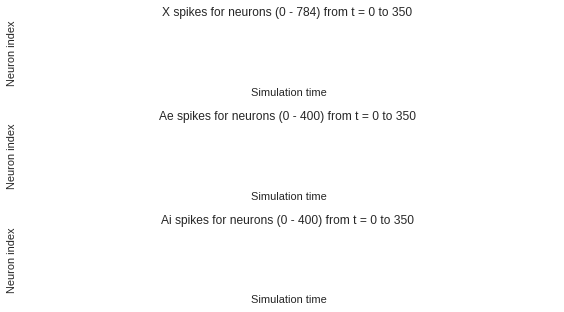

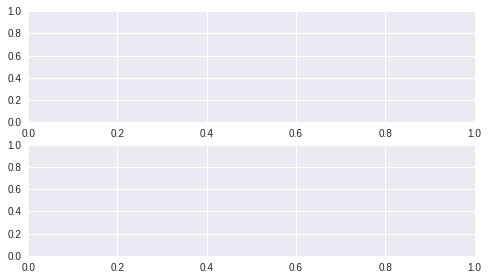

In [8]:
from bindsnet.datasets import MNIST
from bindsnet.encoding import poisson
from bindsnet.pipeline import Pipeline
from bindsnet.models import DiehlAndCook2015
from bindsnet.environment import DatasetEnvironment

# Build Diehl & Cook 2015 network.
network = DiehlAndCook2015(n_inpt=784, n_neurons=400, exc=22.5,
                           inh=17.5, dt=1.0, norm=78.4)

# Specify dataset wrapper environment.
environment = DatasetEnvironment(dataset=MNIST(path='../../data/MNIST', download=True),
                                 train=True, intensity=0.25)

# Build pipeline from components.
pipeline = Pipeline(network=network, environment=environment, plot_type='line',
                    encoding=poisson, time=350, plot_interval=1)

# Train the network.
for i in range(60000):
    pipeline.step()
    network.reset_()